In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("features_for_ml.csv")
print(df.head())
print(df['genre'].value_counts())

       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0 -196.944473  31.251274 -47.126839  31.020103 -23.601799  18.450792   
1 -202.938614  27.224052 -43.082767  38.410809 -27.631262  18.478142   
2 -211.414749  22.232466 -39.514149  40.834213 -19.209150  23.927193   
3 -195.740265  37.053097 -41.482414  28.398323 -29.919754  17.769850   
4 -183.316055  39.364349 -42.387035  28.520182 -30.673475  15.789607   

      mfcc_7     mfcc_8     mfcc_9    mfcc_10  ...  chroma_10  chroma_11  \
0 -29.242361  19.948065 -25.138317  13.994640  ...   0.455007   0.416221   
1 -27.819164  20.353235 -21.784822  20.549713  ...   0.480691   0.457492   
2 -27.637388  18.635292 -24.474279  15.034540  ...   0.481985   0.498698   
3 -26.777910  19.977528 -23.284115  15.929207  ...   0.488013   0.475795   
4 -27.567493  20.305479 -27.498960  17.030983  ...   0.391098   0.486959   

   chroma_12       zcr      rmse       tempo  spec_centroid  spec_bandwidth  \
0   0.408294  0.276262  0.03403

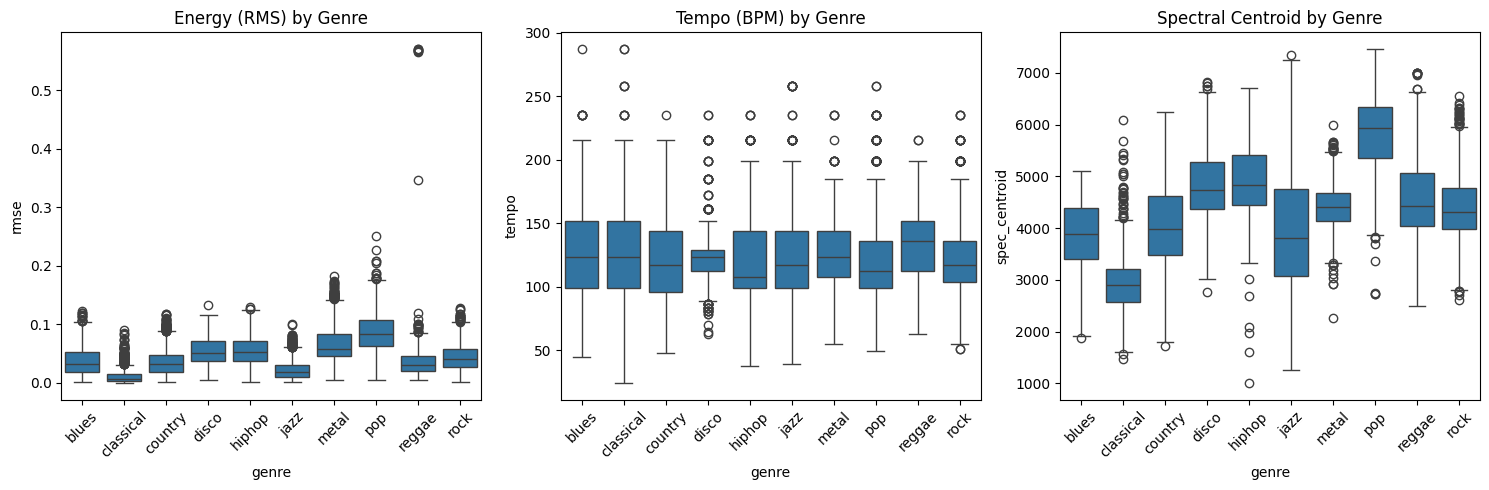

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.boxplot(x='genre', y='rmse', data=df)
plt.xticks(rotation=45)
plt.title("Energy (RMS) by Genre")

plt.subplot(1,3,2)
sns.boxplot(x='genre', y='tempo', data=df)
plt.xticks(rotation=45)
plt.title("Tempo (BPM) by Genre")

plt.subplot(1,3,3)
sns.boxplot(x='genre', y='spec_centroid', data=df)
plt.xticks(rotation=45)
plt.title("Spectral Centroid by Genre")

plt.tight_layout()
plt.show()


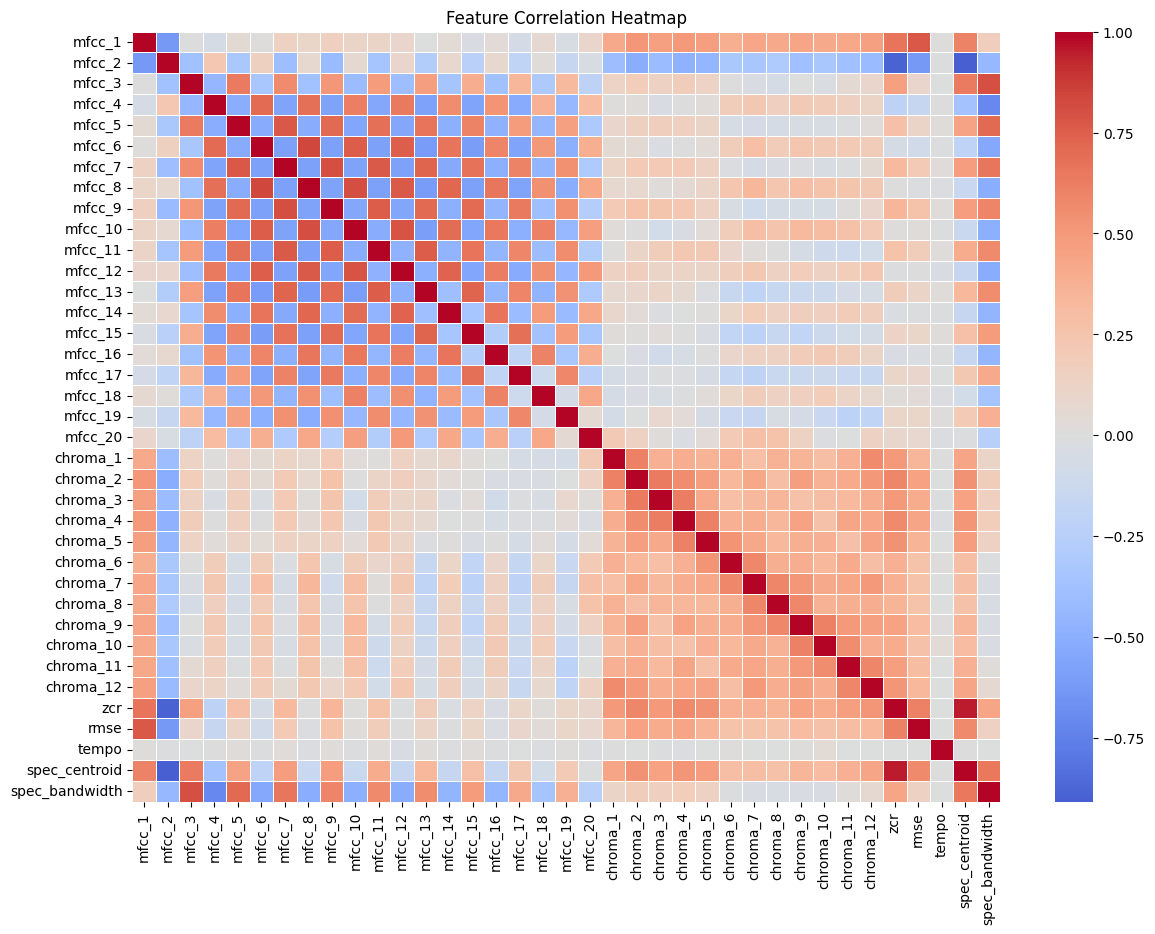

In [4]:
plt.figure(figsize=(14,10))
corr = df.drop(columns=['genre','filename']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


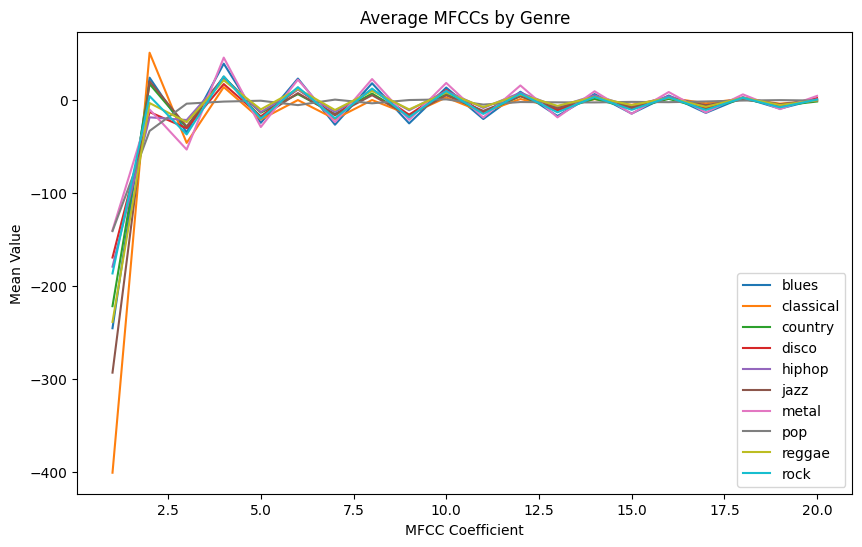

In [5]:
import numpy as np

mfcc_cols = [f"mfcc_{i+1}" for i in range(20)]

plt.figure(figsize=(10,6))
for genre in df['genre'].unique():
    mfcc_means = df[df['genre'] == genre][mfcc_cols].mean()
    plt.plot(range(1, 21), mfcc_means, label=genre)

plt.title("Average MFCCs by Genre")
plt.xlabel("MFCC Coefficient")
plt.ylabel("Mean Value")
plt.legend()
plt.show()


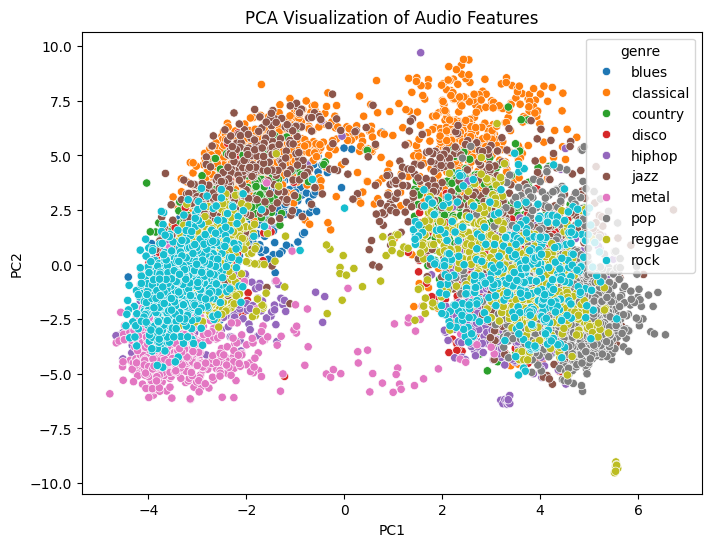

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['genre','filename'])
y = df['genre']

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10')
plt.title("PCA Visualization of Audio Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


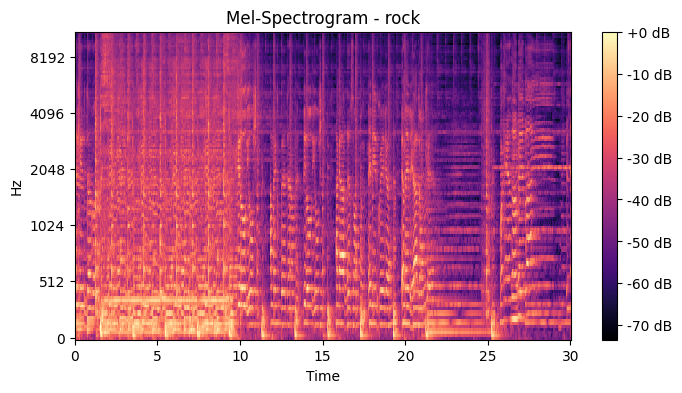

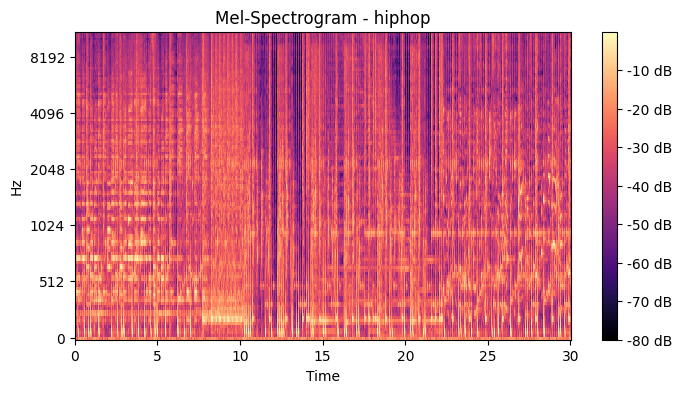

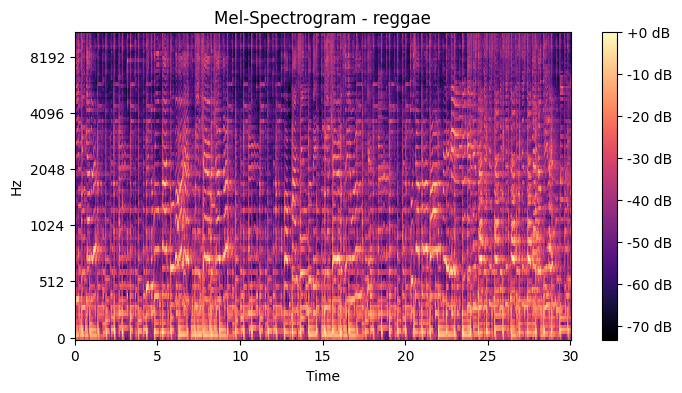

In [7]:
import librosa.display
import random, os

for genre in random.sample(list(df['genre'].unique()), 3):
    sample_file = df[df['genre'] == genre]['filename'].iloc[0]
    file_path = os.path.join("GTZAN", genre, sample_file)
    y, sr = librosa.load(file_path, sr=22050)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(8,4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel-Spectrogram - {genre}")
    plt.show()


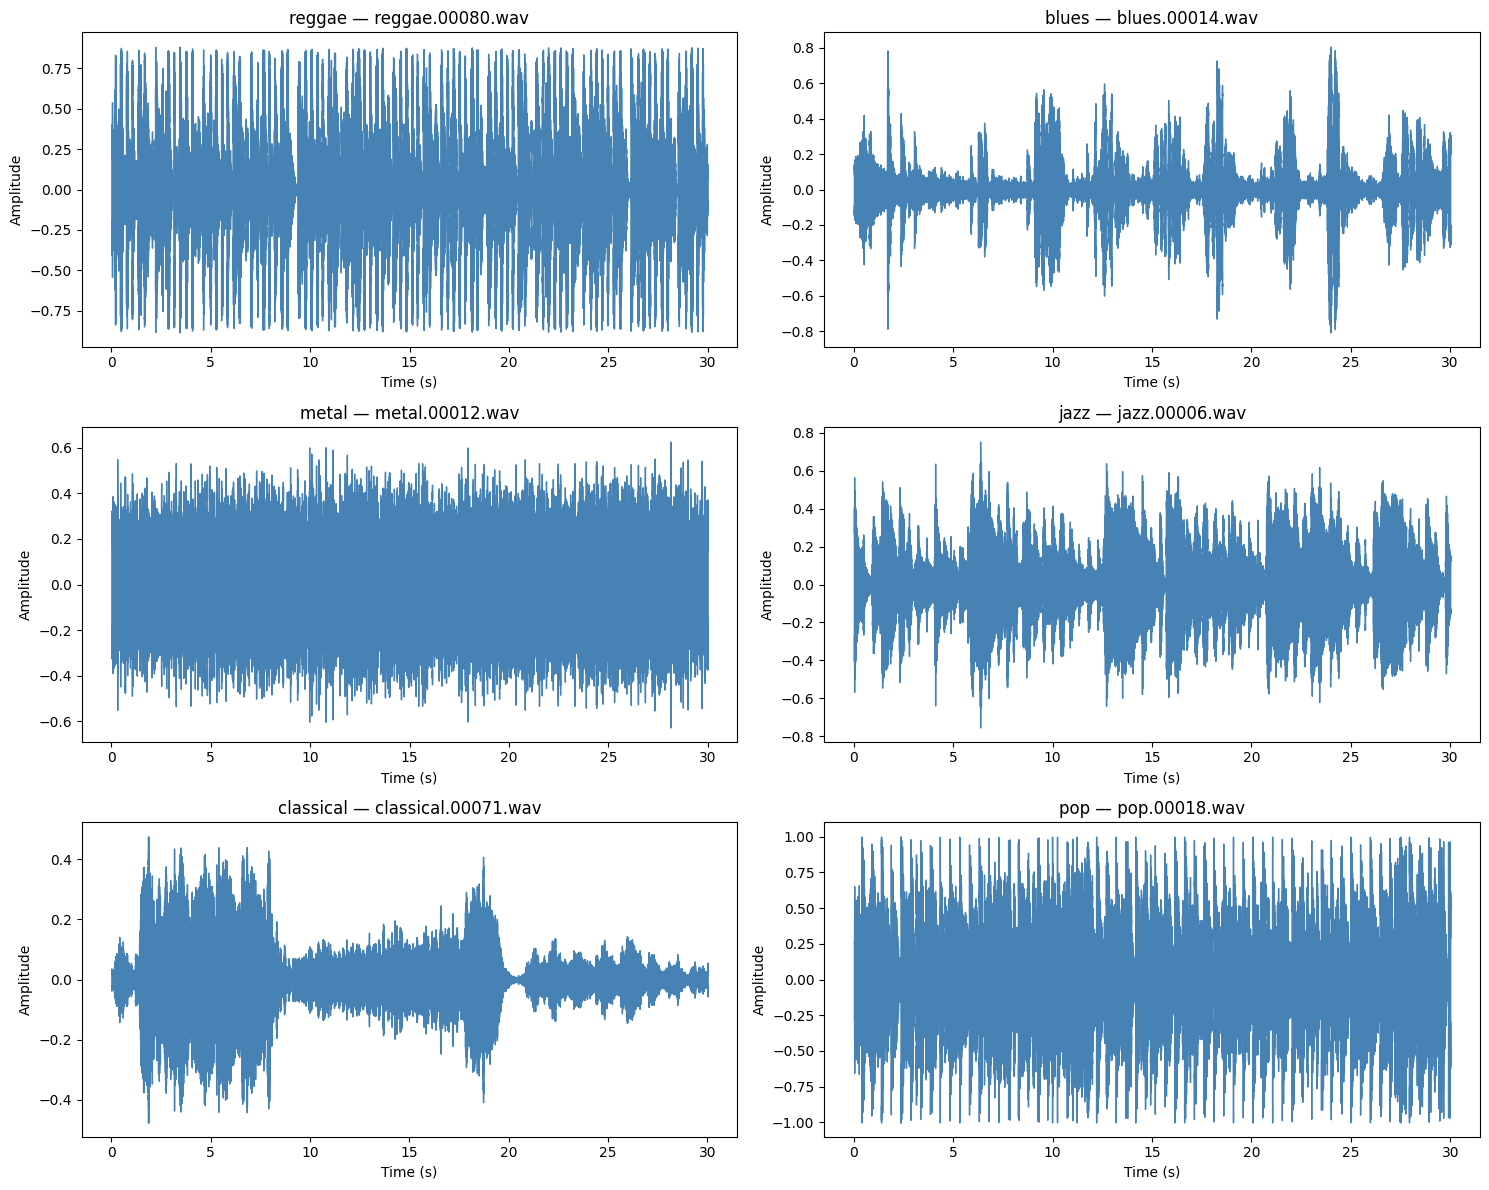

In [8]:
genres = [g for g in os.listdir("GTZAN") if os.path.isdir(os.path.join("GTZAN", g))]

plt.figure(figsize=(15, 12))

for i, genre in enumerate(random.sample(genres, 6)):  # lấy 6 genre ngẫu nhiên
    genre_dir = os.path.join("GTZAN", genre)
    wav_files = [f for f in os.listdir(genre_dir) if f.endswith('.wav')]
    sample_file = random.choice(wav_files)
    file_path = os.path.join(genre_dir, sample_file)

    # Load âm thanh
    y, sr = librosa.load(file_path, sr=22050, mono=True)

    # Vẽ waveplot
    plt.subplot(3, 2, i + 1)
    librosa.display.waveshow(y, sr=sr, color='steelblue')
    plt.title(f"{genre} — {sample_file}", fontsize=12)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [9]:
print("Columns containing missing values",list(df.columns[df.isnull().any()]))


Columns containing missing values []


In [10]:
from sklearn.preprocessing import LabelEncoder

converter = LabelEncoder()
y = converter.fit_transform(df['genre'])
print(y)
print(converter.classes_)


[0 0 0 ... 9 9 9]
['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 7984
Validation samples: 998
Test samples: 999


Training set score: 0.939
Test set score: 0.832
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       100
           1       0.81      0.95      0.87       100
           2       0.80      0.70      0.75        99
           3       0.75      0.89      0.81       100
           4       0.76      0.86      0.81       100
           5       0.87      0.70      0.78        99
           6       0.93      0.96      0.95       100
           7       0.93      0.78      0.85       100
           8       0.87      0.80      0.83       100
           9       0.89      0.73      0.80       100

    accuracy                           0.83       998
   macro avg       0.84      0.83      0.83       998
weighted avg       0.84      0.83      0.83       998



['knn_model.pkl']

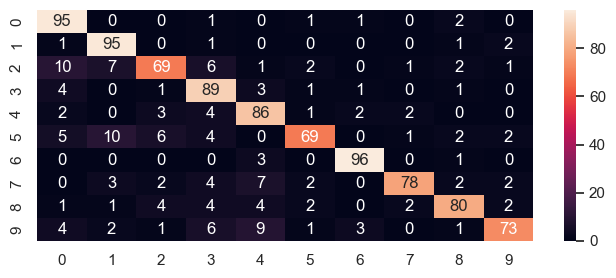

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib 

clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_val)
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(X_val, y_val)))
cf_matrix = confusion_matrix(y_val, y_pred)
sns.set(rc = {'figure.figsize':(8,3)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_val, y_pred))

joblib.dump(clf1, 'knn_model.pkl')

Training set accuracy: 0.999
Test set accuracy: 0.842


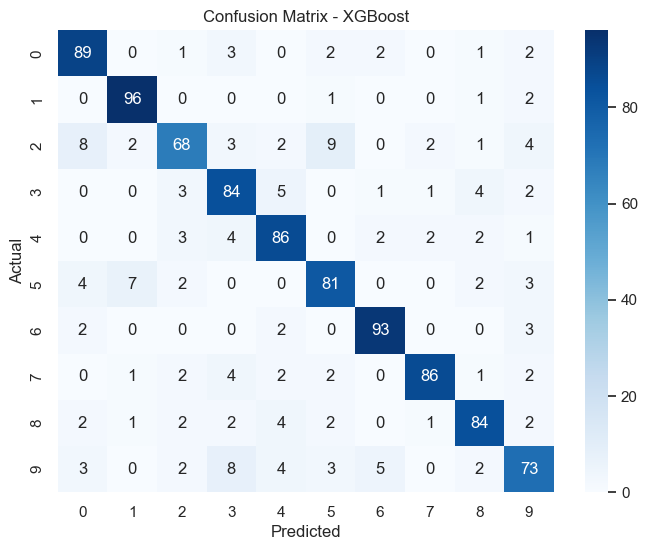

              precision    recall  f1-score   support

       blues       0.82      0.89      0.86       100
   classical       0.90      0.96      0.93       100
     country       0.82      0.69      0.75        99
       disco       0.78      0.84      0.81       100
      hiphop       0.82      0.86      0.84       100
        jazz       0.81      0.82      0.81        99
       metal       0.90      0.93      0.92       100
         pop       0.93      0.86      0.90       100
      reggae       0.86      0.84      0.85       100
        rock       0.78      0.73      0.75       100

    accuracy                           0.84       998
   macro avg       0.84      0.84      0.84       998
weighted avg       0.84      0.84      0.84       998



['xgb_model.pkl']

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf2 = XGBClassifier(
    n_estimators=200,      
    learning_rate=0.1,     
    max_depth=6,            
    subsample=0.8,           
    colsample_bytree=0.75,    
    random_state=42,
    eval_metric='mlogloss'
)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_val)

train_acc = accuracy_score(y_train, clf2.predict(X_train))
test_acc = accuracy_score(y_val, y_pred)

print(f"Training set accuracy: {train_acc:.3f}")
print(f"Test set accuracy: {test_acc:.3f}")

cf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_val, y_pred, target_names=converter.classes_))
joblib.dump(clf2, 'xgb_model.pkl')

Training set accuracy: 0.964
Test set accuracy: 0.856


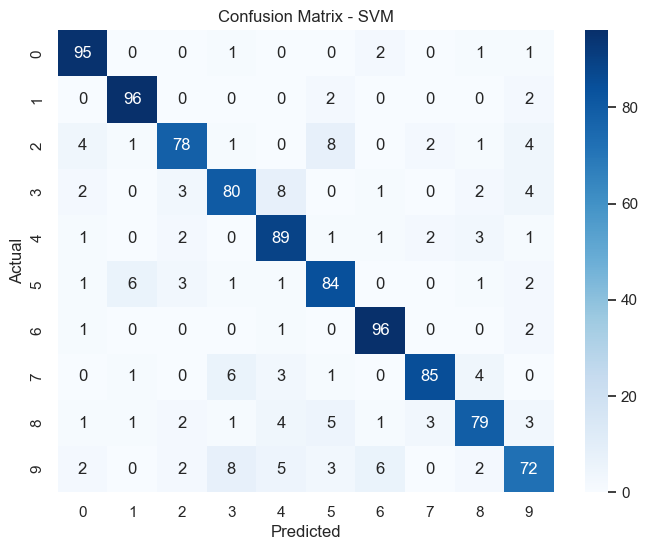

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.91      0.96      0.94       100
           2       0.87      0.79      0.83        99
           3       0.82      0.80      0.81       100
           4       0.80      0.89      0.84       100
           5       0.81      0.85      0.83        99
           6       0.90      0.96      0.93       100
           7       0.92      0.85      0.89       100
           8       0.85      0.79      0.82       100
           9       0.79      0.72      0.75       100

    accuracy                           0.86       998
   macro avg       0.86      0.86      0.85       998
weighted avg       0.86      0.86      0.85       998



['svm_model.pkl']

In [14]:
from sklearn.svm import SVC

clf3 = SVC(probability=True, kernel='rbf', C=5, gamma='scale', random_state=42)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_val)

train_acc = accuracy_score(y_train, clf3.predict(X_train))
test_acc = accuracy_score(y_val, y_pred)

print(f"Training set accuracy: {train_acc:.3f}")
print(f"Test set accuracy: {test_acc:.3f}")

cf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_val, y_pred))
joblib.dump(clf3, 'svm_model.pkl')

Ensemble (Voting) Accuracy: 0.888


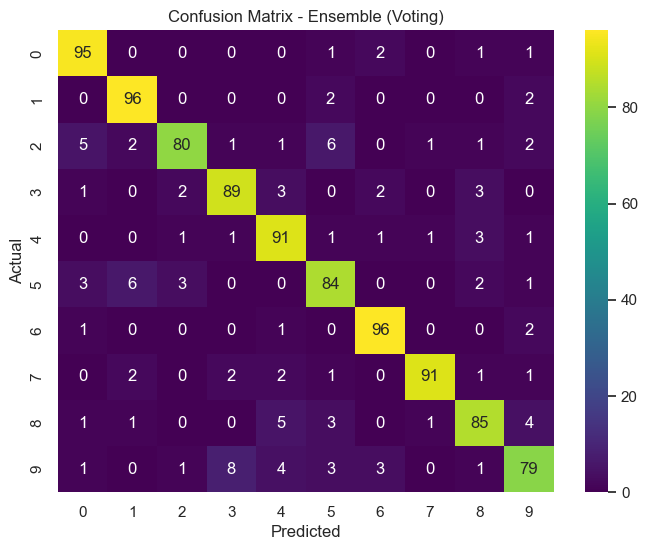

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.90      0.96      0.93       100
           2       0.92      0.81      0.86        99
           3       0.88      0.89      0.89       100
           4       0.85      0.91      0.88       100
           5       0.83      0.85      0.84        99
           6       0.92      0.96      0.94       100
           7       0.97      0.91      0.94       100
           8       0.88      0.85      0.86       100
           9       0.85      0.79      0.82       100

    accuracy                           0.89       998
   macro avg       0.89      0.89      0.89       998
weighted avg       0.89      0.89      0.89       998



['ensemble_model.pkl']

In [15]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=200, random_state=42)
model2 = XGBClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=6,
    subsample=0.8, colsample_bytree=0.75, eval_metric='mlogloss',
    random_state=42
)
model3 = KNeighborsClassifier(n_neighbors=3)
model4 = SVC(probability=True, kernel='rbf', C=5, gamma='scale', random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', model1),
        ('xgb', model2),
        ('knn', model3),
        ('svm', model4)
    ],
    voting='soft'  
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print(f"Ensemble (Voting) Accuracy: {acc:.3f}")

cf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Ensemble (Voting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_val, y_pred))
joblib.dump(voting_clf, 'ensemble_model.pkl')

🔹 KNN Accuracy: 0.820
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.85      0.92      0.88       100
           2       0.70      0.69      0.70       100
           3       0.75      0.86      0.80       100
           4       0.83      0.89      0.86       100
           5       0.79      0.75      0.77        99
           6       0.93      0.95      0.94       100
           7       0.92      0.82      0.87       100
           8       0.85      0.82      0.83       100
           9       0.83      0.63      0.72       100

    accuracy                           0.82       999
   macro avg       0.82      0.82      0.82       999
weighted avg       0.82      0.82      0.82       999

------------------------------------------------------------
🔹 SVM Accuracy: 0.853
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       100
           1       0.93    

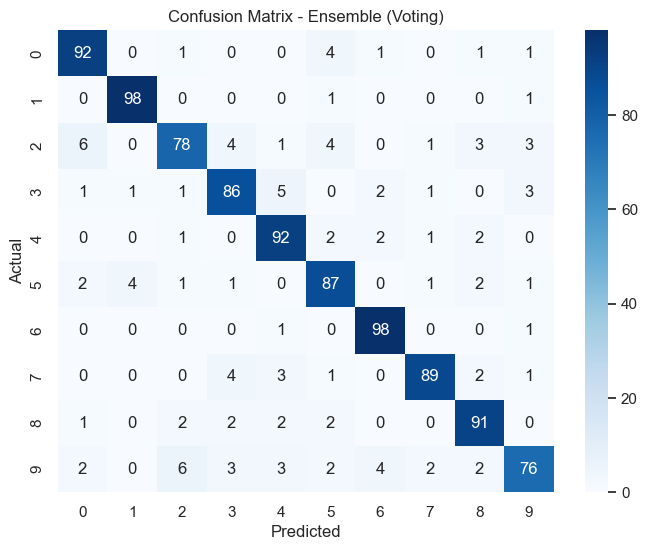

Best Model: Ensemble (Voting) with Accuracy = 0.888


In [16]:
knn_model = joblib.load('knn_model.pkl')
svm_model = joblib.load('svm_model.pkl')
xgb_model = joblib.load('xgb_model.pkl')
ensemble_model = joblib.load('ensemble_model.pkl')

models = {
    'KNN': knn_model,
    'SVM': svm_model,
    'XGBoost': xgb_model,
    'Ensemble (Voting)': ensemble_model
}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"🔹 {name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_best_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.3f}")

In [17]:
df_results = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
df_results.to_csv('model_test_results.csv', index=False)